In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import plotly
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score
from plotly.subplots import make_subplots
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,train_test_split
import plotly
import plotly.express as px
%matplotlib inline

Load data

In [31]:
data_1 = pd.read_csv('/content/drive/MyDrive/data/genres_v2.csv')
play_lists = pd.read_csv('/content/drive/MyDrive/data/playlists.csv')
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4,Dark Trap


In [32]:
play_lists.head()

,Playlist,Genre
0,19WuHd4MxWLzE1fpMmw4S4,Dark Trap
1,6XyR8uzgkSoDzHuOxxRtLH,Dark Trap
2,37Ij3ofyhvEhFEH8YZMZ2X,Dark Trap
3,07zTlfPpsxeoWdumbkNWMI,Dark Trap
4,2dClSRLsnptdkDQnpi5H2f,Dark Trap


In [33]:
play_lists.isna().sum()

Playlist    0
Genre       0
dtype: int64

Let's check and see if we have missing data

In [34]:
data.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
genre               0
dtype: int64

As we can see above, missing values are only in last 3 columns and this will not affect our analysis of predicting genre

In [35]:
data = data_1.drop(['title','Unnamed: 0','id','uri','track_href','analysis_url','type','song_name'],axis=1)
print(data.columns)

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'genre'],
      dtype='object')


In [36]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4,Dark Trap


In [37]:
data.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
genre               0
dtype: int64

In [38]:
data.shape

(42305, 14)

In [39]:
genre = data['genre']

In [40]:
np.unique(genre)

array(['Dark Trap', 'Emo', 'Hiphop', 'Pop', 'Rap', 'RnB', 'Trap Metal',
       'Underground Rap', 'dnb', 'hardstyle', 'psytrance', 'techhouse',
       'techno', 'trance', 'trap'], dtype=object)

In [41]:
grouped_genre = data.groupby('genre')

In [42]:
grouped_genre.mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
genre,,,,,,,,,,,,,
Dark Trap,0.618834,0.646851,5.298384,-7.998401,0.536479,0.123434,0.159493,0.277276,0.185081,0.273663,149.791186,187707.330275,3.961337
Emo,0.493699,0.761175,5.052976,-5.433641,0.685714,0.080325,0.143094,0.011402,0.195243,0.444145,153.888640,218317.432143,3.938690
Hiphop,0.698982,0.654418,5.553170,-7.014983,0.527741,0.217150,0.195569,0.017154,0.210581,0.523628,162.980479,227954.272787,3.975561
Pop,0.676807,0.697638,5.399132,-5.632072,0.548807,0.088363,0.149251,0.013831,0.177949,0.550264,152.098937,211392.828633,3.984816
Rap,0.742877,0.620083,5.048701,-6.887086,0.522186,0.217862,0.170566,0.006939,0.181320,0.440921,126.006374,203007.674784,3.985931
RnB,0.674206,0.598884,5.021915,-6.899896,0.532158,0.143110,0.225276,0.007400,0.178984,0.493974,157.533793,226402.473559,3.960934
Trap Metal,0.647564,0.749157,4.663088,-5.879087,0.717791,0.209677,0.114926,0.057051,0.243655,0.348786,148.684947,147195.234151,3.953476
Underground Rap,0.744658,0.635776,5.059064,-7.362036,0.613617,0.224992,0.162708,0.025280,0.191116,0.444629,152.914521,176152.595234,3.979915
dnb,0.520944,0.873433,5.619016,-4.063237,0.446055,0.083478,0.019543,0.459998,0.202883,0.253062,173.849166,286548.825017,3.998314


In [43]:
grouped_genre.min()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
genre,,,,,,,,,,,,,
Dark Trap,0.0979,0.000243,0,-25.222,0,0.0242,0.000001,0.000000,0.0307,0.0235,75.418,42133,1
Emo,0.1110,0.014800,0,-32.929,0,0.0232,0.000001,0.000000,0.0210,0.0358,87.018,50720,1
Hiphop,0.1970,0.027900,0,-24.694,0,0.0227,0.000017,0.000000,0.0219,0.0352,95.622,38333,1
Pop,0.2090,0.173000,0,-16.423,0,0.0232,0.000068,0.000000,0.0215,0.0383,106.960,121143,1
Rap,0.2410,0.144000,0,-19.720,0,0.0271,0.000151,0.000000,0.0221,0.0362,57.967,77500,1
RnB,0.1910,0.060900,0,-29.478,0,0.0239,0.000081,0.000000,0.0235,0.0338,91.560,62213,1
Trap Metal,0.0651,0.000243,0,-33.357,0,0.0242,0.000001,0.000000,0.0221,0.0206,74.716,52963,1
Underground Rap,0.2410,0.134000,0,-21.657,0,0.0251,0.000018,0.000000,0.0221,0.0294,95.622,49227,1
dnb,0.1380,0.349000,0,-17.088,0,0.0265,0.000003,0.000000,0.0189,0.0253,169.857,35862,1


In [44]:
grouped_genre.max()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
genre,,,,,,,,,,,,,
Dark Trap,0.985,0.998,11,1.646,1,0.946,0.984,0.989,0.958,0.968,220.290,534857,5
Emo,0.926,0.995,11,-0.946,1,0.729,0.988,0.952,0.943,0.971,208.951,548253,5
Hiphop,0.988,0.978,11,-0.067,1,0.944,0.982,0.947,0.973,0.975,206.247,723573,5
Pop,0.935,0.977,11,-2.058,1,0.463,0.948,0.947,0.790,0.966,210.796,484147,5
Rap,0.981,0.980,11,-1.181,1,0.833,0.883,0.951,0.892,0.970,205.895,728413,5
RnB,0.978,0.974,11,0.175,1,0.786,0.986,0.939,0.965,0.979,215.669,602297,5
Trap Metal,0.985,0.999,11,3.148,1,0.908,0.986,0.963,0.962,0.976,214.034,474157,5
Underground Rap,0.985,0.997,11,2.499,1,0.914,0.947,0.964,0.962,0.980,207.982,636213,5
dnb,0.855,0.999,11,3.108,1,0.906,0.783,0.968,0.981,0.970,177.100,514629,5


In [45]:
grouped_genre.std()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
genre,,,,,,,,,,,,,
Dark Trap,0.161002,0.180810,3.638048,3.156933,0.498722,0.123217,0.214746,0.366365,0.144774,0.206191,27.201544,60377.140798,0.368688
Emo,0.126014,0.220404,3.477168,2.598227,0.464369,0.075109,0.260326,0.077927,0.145681,0.202451,27.545931,43426.023963,0.318840
Hiphop,0.142183,0.162416,3.679533,2.827193,0.499312,0.131501,0.219940,0.093075,0.162457,0.222957,28.188804,60884.353006,0.329274
Pop,0.119175,0.155379,3.644698,1.947846,0.498153,0.081074,0.198390,0.085986,0.140379,0.215627,32.360009,35368.133282,0.250624
Rap,0.127670,0.137444,3.705862,2.353116,0.499643,0.134830,0.178520,0.058052,0.132247,0.215302,29.106285,59281.310692,0.284631
RnB,0.140207,0.164788,3.638515,2.518220,0.499084,0.112993,0.231904,0.060419,0.133160,0.221235,29.820987,50866.054759,0.361912
Trap Metal,0.169564,0.174147,3.748826,3.038965,0.450189,0.159220,0.166583,0.177845,0.186634,0.215788,26.672863,45075.031628,0.343568
Underground Rap,0.128180,0.155994,3.777848,2.755624,0.486962,0.144794,0.186051,0.116380,0.148016,0.224521,26.671957,54752.469716,0.283957
dnb,0.106605,0.097925,3.589637,1.946063,0.497165,0.076611,0.051514,0.359274,0.167220,0.185296,1.141970,51728.231272,0.066194


Since we are going to predict the genre , let's check the "genre" column for data types

In [46]:
genre_count = {}
for gen in np.unique(genre):
    genre_count[gen] = len(data[data['genre'] == gen])
genre_count

{'Dark Trap': 4578,
 'Emo': 1680,
 'Hiphop': 3028,
 'Pop': 461,
 'Rap': 1848,
 'RnB': 2099,
 'Trap Metal': 1956,
 'Underground Rap': 5875,
 'dnb': 2966,
 'hardstyle': 2936,
 'psytrance': 2961,
 'techhouse': 2975,
 'techno': 2956,
 'trance': 2999,
 'trap': 2987}

In [47]:
data.dtypes.value_counts()

float64    9
int64      4
object     1
dtype: int64

In [48]:
data.dtypes[data.dtypes=='object']

genre    object
dtype: object

In [49]:
data.dtypes[data.dtypes=='float64']

danceability        float64
energy              float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
dtype: object

In [50]:
data.dtypes[data.dtypes=='int64']

key               int64
mode              int64
duration_ms       int64
time_signature    int64
dtype: object

In [51]:
dtype_df = data.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,4
1,float64,9
2,object,1


In [52]:
obj = data.dtypes[data.dtypes=='object'].index
for i in obj:
    print(i, data[i].unique())

genre ['Dark Trap' 'Underground Rap' 'Trap Metal' 'Emo' 'Rap' 'RnB' 'Pop'
 'Hiphop' 'techhouse' 'techno' 'trance' 'psytrance' 'trap' 'dnb'
 'hardstyle']


In [53]:
data.isna().sum()[data.isna().sum()>0]

Series([], dtype: int64)

 Preprocessing

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from imblearn.over_sampling import SMOTE

data['genre'] = LabelEncoder().fit_transform(data['genre'])
corr = data.corr()
print(corr)

                  danceability    energy  ...  time_signature     genre
danceability          1.000000 -0.323248  ...        0.057711 -0.052687
energy               -0.323248  1.000000  ...        0.039781  0.471327
key                  -0.012708  0.044731  ...        0.008061  0.027398
loudness             -0.216776  0.601540  ...        0.047471  0.160771
mode                  0.084413 -0.032203  ...       -0.009317 -0.019531
speechiness           0.182177 -0.148363  ...        0.021637 -0.144596
acousticness          0.069910 -0.497334  ...       -0.049791 -0.356286
instrumentalness     -0.067114  0.303875  ...       -0.010164  0.414434
liveness             -0.196702  0.231754  ...        0.003077  0.107690
valence               0.369845 -0.013520  ...        0.040308 -0.170698
tempo                -0.165929 -0.024504  ...       -0.019778 -0.231731
duration_ms          -0.049807  0.294464  ...        0.003040  0.412508
time_signature        0.057711  0.039781  ...        1.000000  0

Correlation Analysis

In [55]:
corr['genre']

danceability       -0.052687
energy              0.471327
key                 0.027398
loudness            0.160771
mode               -0.019531
speechiness        -0.144596
acousticness       -0.356286
instrumentalness    0.414434
liveness            0.107690
valence            -0.170698
tempo              -0.231731
duration_ms         0.412508
time_signature      0.019943
genre               1.000000
Name: genre, dtype: float64

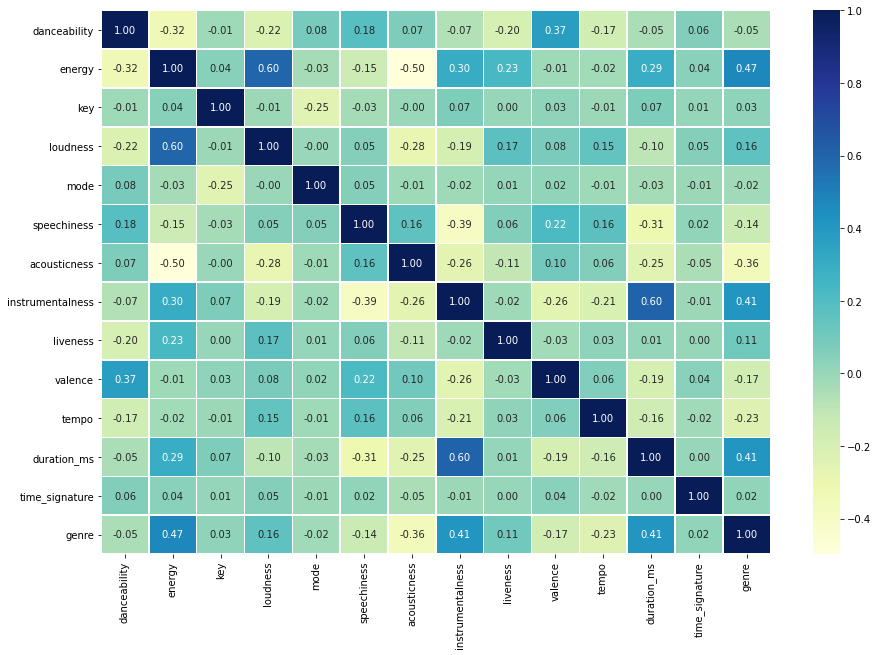

In [56]:
corr_matrix=data.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");

In [57]:
numeric = data._get_numeric_data()
genre = data['genre']
print(numeric.head())
print("Numeric columns: ",end=" ")
print(numeric.columns)
print(len(numeric.columns))


numeric.describe()

   danceability  energy  key  ...  duration_ms  time_signature  genre
0         0.831   0.814    2  ...       124539               4      0
1         0.719   0.493    8  ...       224427               4      0
2         0.850   0.893    5  ...        98821               4      0
3         0.476   0.781    0  ...       123661               3      0
4         0.798   0.624    2  ...       123298               4      0

[5 rows x 14 columns]
Numeric columns:  Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'genre'],
      dtype='object')
14


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,7.295379
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,4.371303
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,4.000000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,7.000000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,11.000000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,14.000000


Visualization

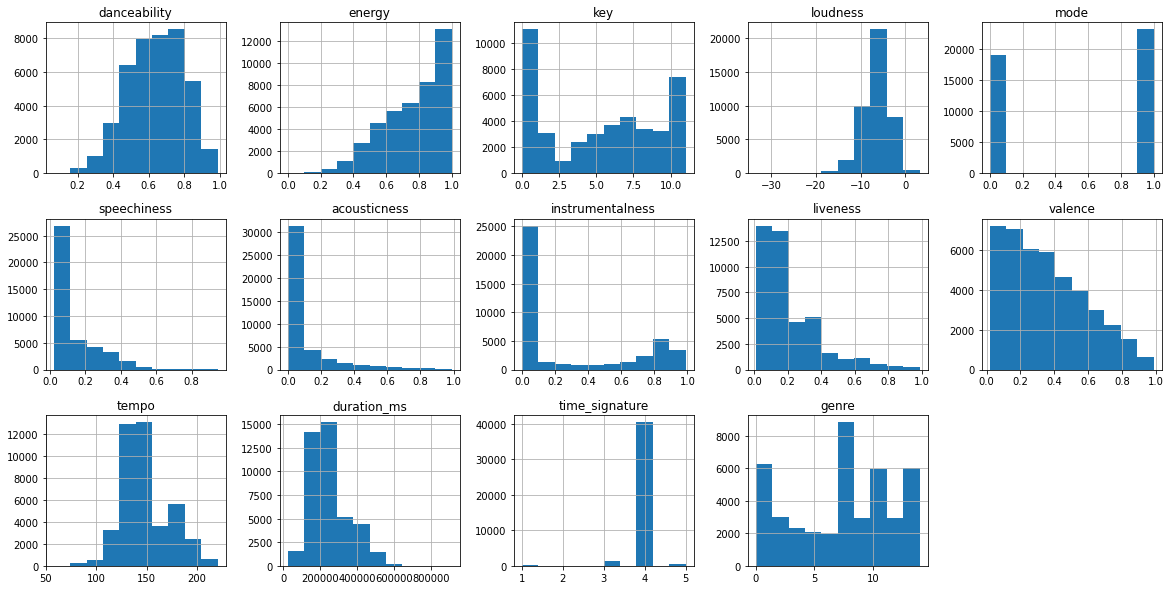

In [58]:
num_hist = numeric.hist(layout=(3,5),figsize=(20,10))
plt.show()

Features of each genre

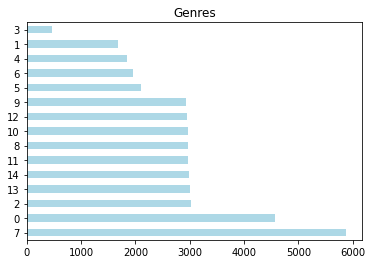

In [59]:
data["genre"].value_counts().plot(kind="barh",color=["lightblue"],title="Genres");

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14')]

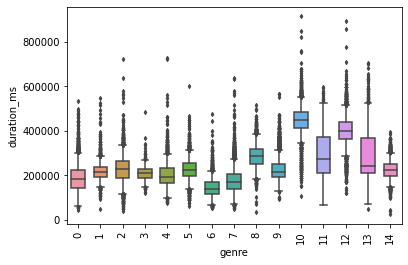

In [60]:
ax = sns.boxplot(data=data,y='duration_ms',x='genre',width= 0.6, fliersize=3,whis=1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

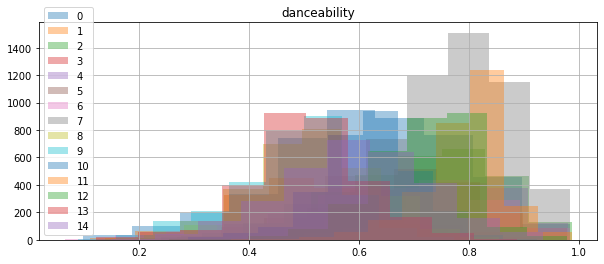

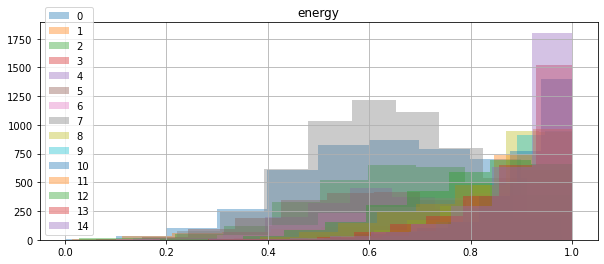

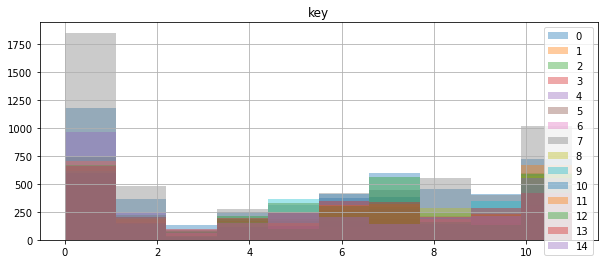

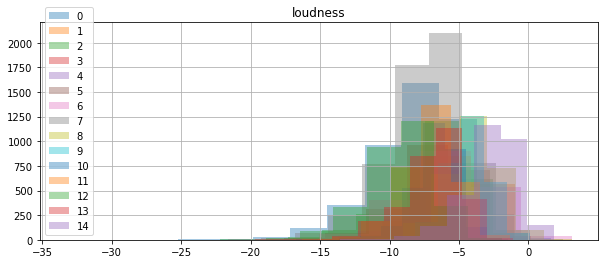

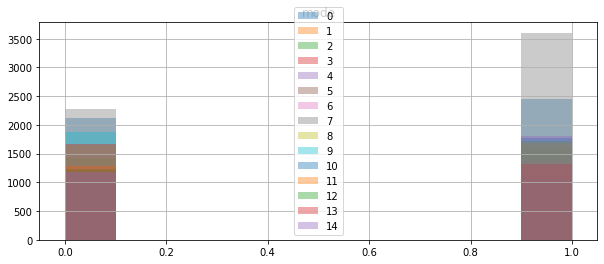

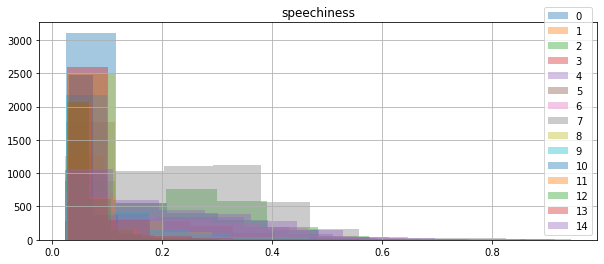

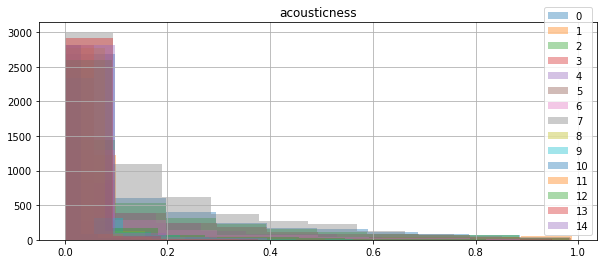

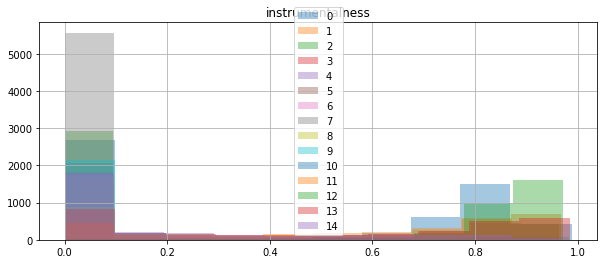

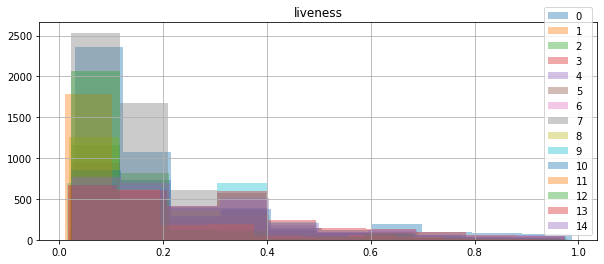

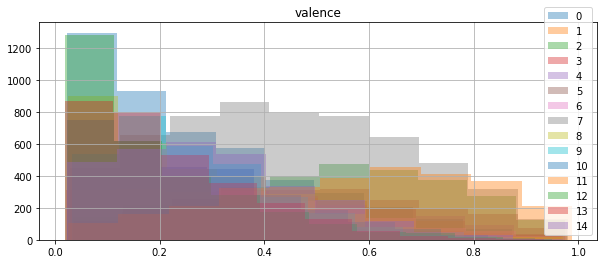

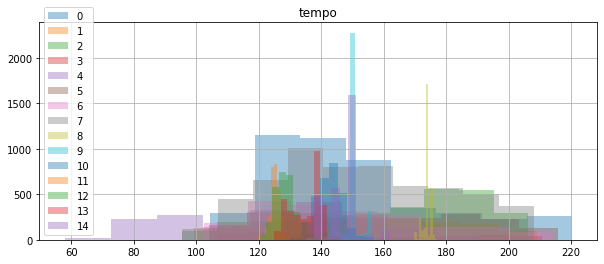

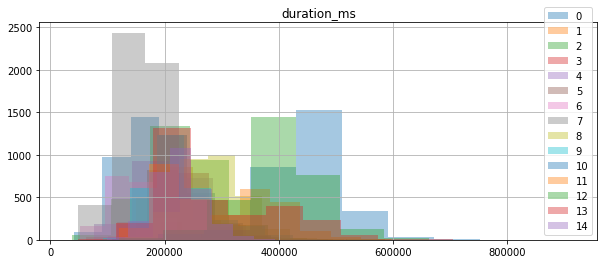

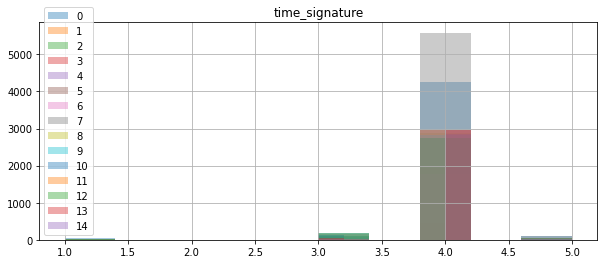

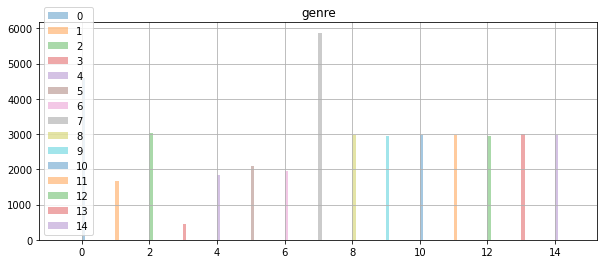

In [61]:
grouped_genre = data.groupby('genre')

for col in numeric.columns:
    fig,ax = plt.subplots()
    
    for i, d in grouped_genre:
        d[col].hist(alpha=0.4, ax=ax, label=i,figsize=(10,4))
        ax.set_title(col)

    ax.legend()
    plt.show()

Select features

In [62]:
features = data.drop(['key','mode','time_signature','danceability','genre'],axis=1)
features

,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.814,-7.364,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,124539
1,0.493,-7.230,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,224427
2,0.893,-4.783,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,98821
3,0.781,-4.710,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,123661
4,0.624,-7.668,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,123298
...,...,...,...,...,...,...,...,...,...
42300,0.693,-5.148,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,269208
42301,0.768,-7.922,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,210112
42302,0.821,-3.102,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,234823
42303,0.921,-4.777,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,323200


In [63]:
labels = data['genre']
features = StandardScaler().fit_transform(features)


oversample = SMOTE()
features, labels = oversample.fit_resample(features, labels)

xtrain,xtest,ytrain,ytest = train_test_split(features,labels,test_size=0.2,shuffle=True)

In [64]:
labels

array([ 0,  0,  0, ..., 14, 14, 14])

Modelling

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


model = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, xtrain, ytrain, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [66]:
n_scores

array([0.80028369, 0.79163121, 0.79390071, 0.80425532, 0.8012766 ,
       0.79560284, 0.80780142, 0.7987234 , 0.79148936, 0.79673759,
       0.79446809, 0.80099291, 0.80070922, 0.80113475, 0.79361702,
       0.79716312, 0.79134752, 0.8022695 , 0.79687943, 0.80453901,
       0.79730496, 0.79716312, 0.79248227, 0.80836879, 0.79957447,
       0.79943262, 0.7951773 , 0.79049645, 0.80028369, 0.80595745])

In [67]:
n_scores.mean()

0.7983687943262411

In [68]:

model.fit(xtrain,ytrain)
pred = model.predict(xtest)
pred

array([10,  8,  6, ...,  6, 13,  6])

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.8031205673758866

Hyperparameter tuning with RandomizedSearchCV for Random Forest models

In [70]:

rf_grid={"n_estimators": np.arange(10,1200,50),
         "max_depth":[None,3,5,10,15],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2),
         'max_features': ['log2', 'sqrt'],
         'bootstrap': [True, False]}
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        n_iter=20,
                        verbose=True)
rs_rf.fit(xtrain,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 186.7min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [71]:
rs_rf.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 14,
 'n_estimators': 110}

In [72]:
rs_rf.score(xtest,ytest)

0.788595744680851

In [73]:
y_preds=rs_rf.predict(xtest)
preds_df=pd.DataFrame(y_preds)
preds_df.head()

,0
0,10
1,8
2,6
3,1
4,6


In [74]:
comparison=pd.DataFrame(data={"actual":y_preds,"prediction":ytest})
comparison.head()

,actual,prediction
0,10,10
1,8,8
2,6,6
3,1,1
4,6,7


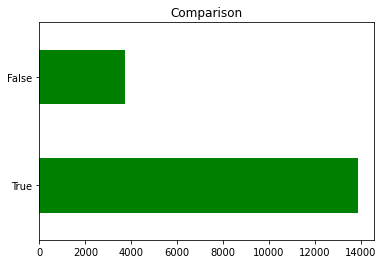

In [75]:
comparison["result"]=comparison["actual"]==comparison["prediction"]
comparison["result"].value_counts().plot(kind="barh",color=["green"],title="Comparison");


In [81]:
rs_df = pd.DataFrame(rs_rf.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,split3_test_score,split4_test_score,mean_test_score,rank_test_score
0,110,14,3,log2,None,False,0.779645,0.780496,0.780000,1
1,460,6,3,sqrt,None,True,0.779433,0.778723,0.779603,2
2,110,6,1,sqrt,15,False,0.764468,0.760071,0.761674,3
3,1010,8,3,log2,15,False,0.761418,0.756950,0.758823,4
4,60,12,7,log2,None,True,0.756383,0.749220,0.750426,5
5,1010,18,7,log2,None,True,0.754043,0.750567,0.749915,6
6,860,10,3,sqrt,15,True,0.750638,0.748156,0.747787,7
7,10,8,3,log2,15,True,0.728936,0.726667,0.728014,8
8,260,16,15,log2,None,True,0.729220,0.724965,0.724936,9
9,910,4,5,sqrt,10,False,0.689007,0.680567,0.682638,10


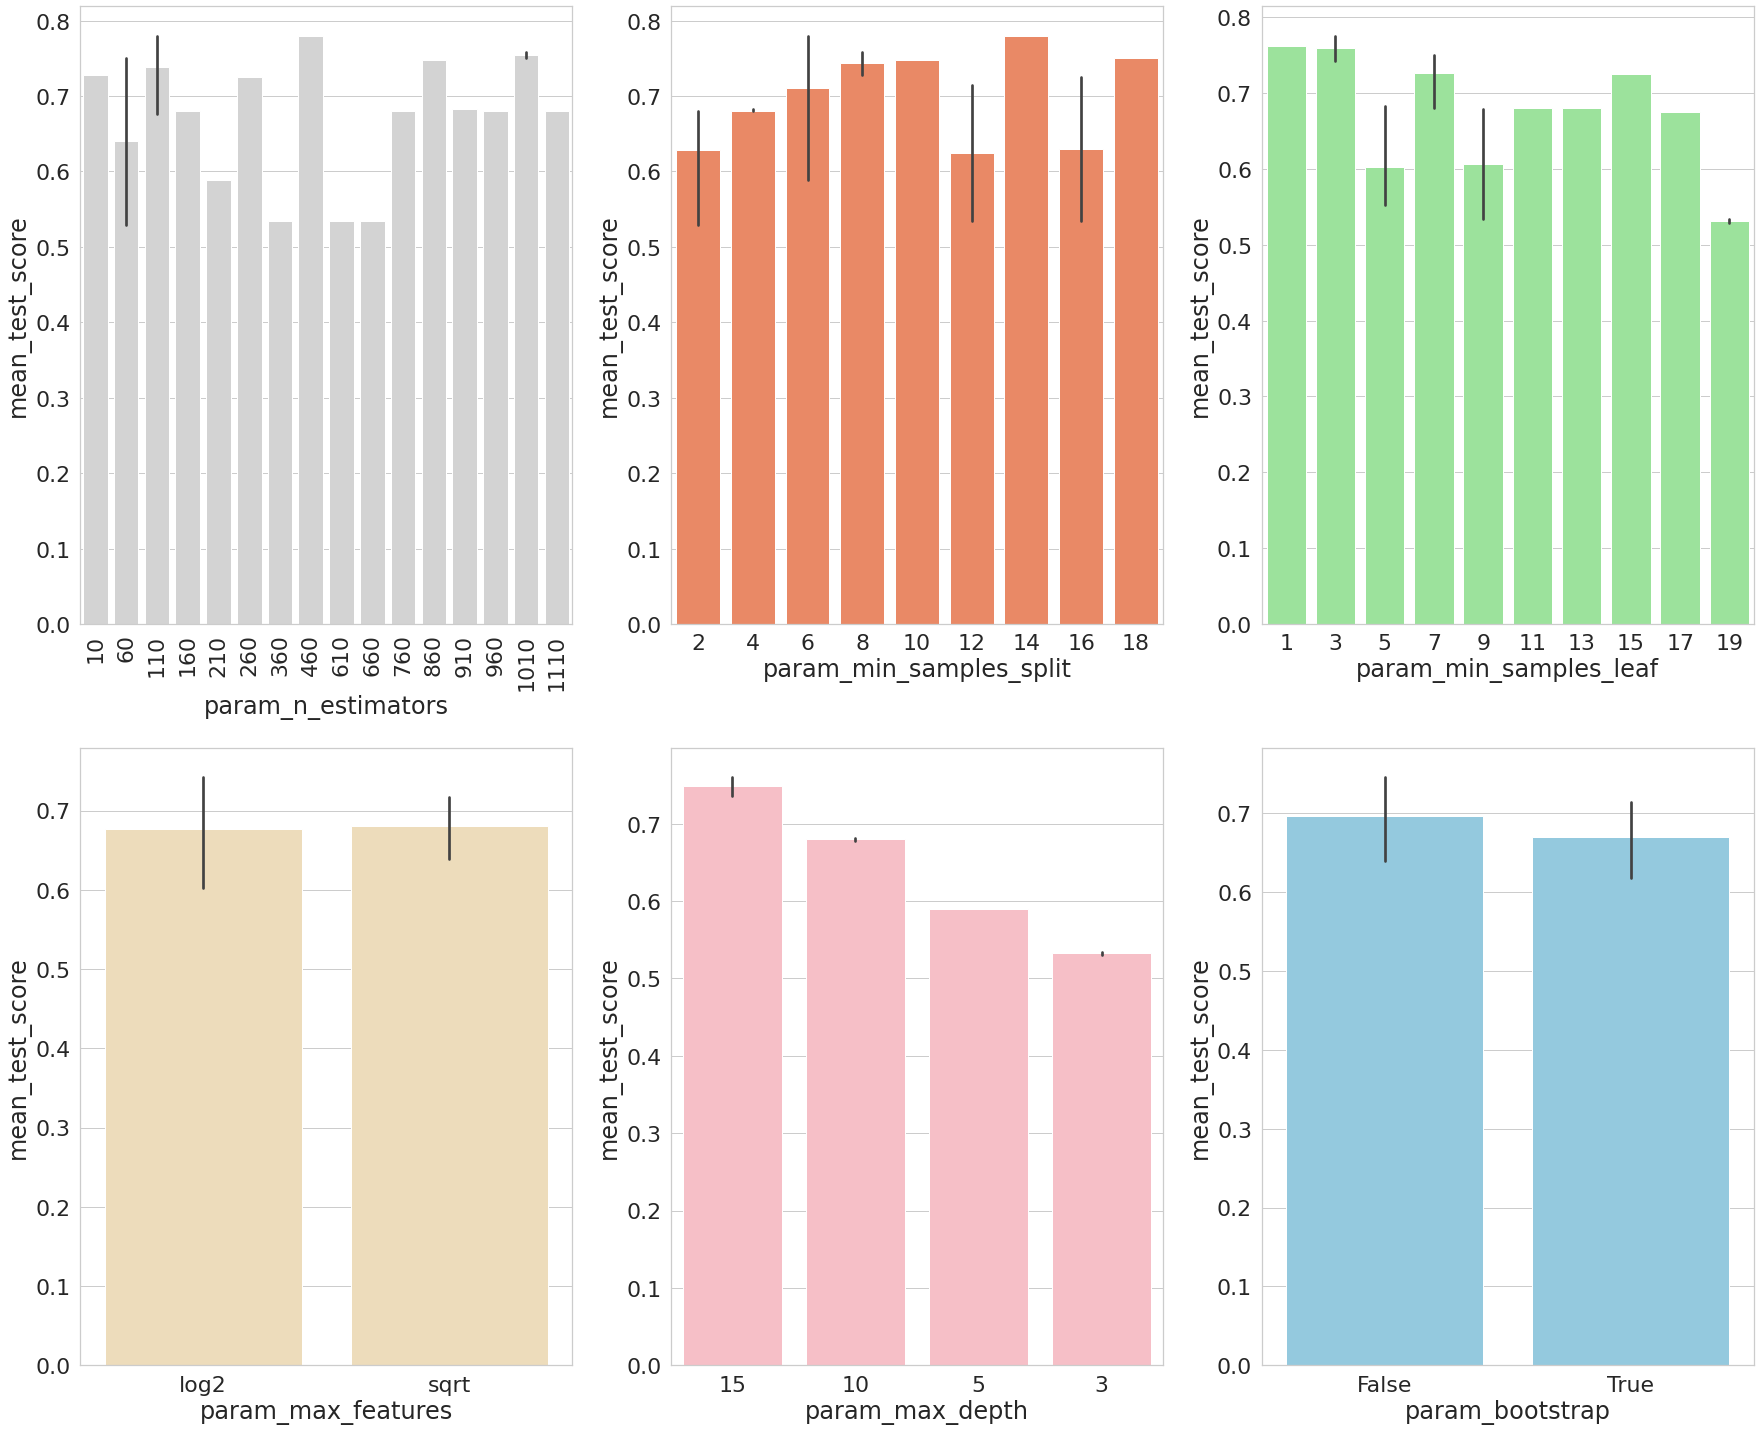

In [82]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)

g = sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
g.set_xticklabels(g.get_xticklabels(), rotation=90)


sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')

sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')

sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')

sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')

sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')



plt.show()

In [87]:
from sklearn.model_selection import GridSearchCV

n_estimators = [110,460,1010]
max_features = ['log2']
max_depth = [10,15]
min_samples_split = [8,10]
min_samples_leaf = [1,3]
bootstrap = [False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(RandomForestClassifier(), param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(xtrain,ytrain)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 66.9min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 122.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [88]:
gs.best_params_

{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 1010}

In [90]:
gs.score(xtest,ytest)

0.7712907801418439

In [92]:
display(gs.score(xtrain,ytrain))

0.8994751773049645

In [93]:
display(gs.score(xtest,ytest))

0.7712907801418439

Conclusion

It is clearly seen that the tunning model gives us the better result on the trained data but the prediction on the test data eventually has the worse value than the first model where the score is 0.8  